# Predicting Chronic Diseases from Personal Wearable Devices

In [1]:
from load import get_csv, get_chronic_data
from process import process_aw_fb_data, process_chronic_data, process_nutri_data
from augment import predict_sex_age_nutri, predict_sex_age_chronic, predict_obesity, assign_disease
from analyze import analyze_aw_fb_data, analyze_chronic_data, analyze_nutri_data, analyze_assigned_diseases, plot_disease_results, analyze_dem_info

## Load Data

--- Downloading https://data.cdc.gov/api/views/hksd-2xuw/rows.csv?accessType=DOWNLOAD ---
loading into DataFrame...
Data loaded successfully
Cleaning chronic_data...
Creating chronic_age_df...
Creating chronic_race_df...
Creating chronic_sex_df...
Data successfully cleaned and split.


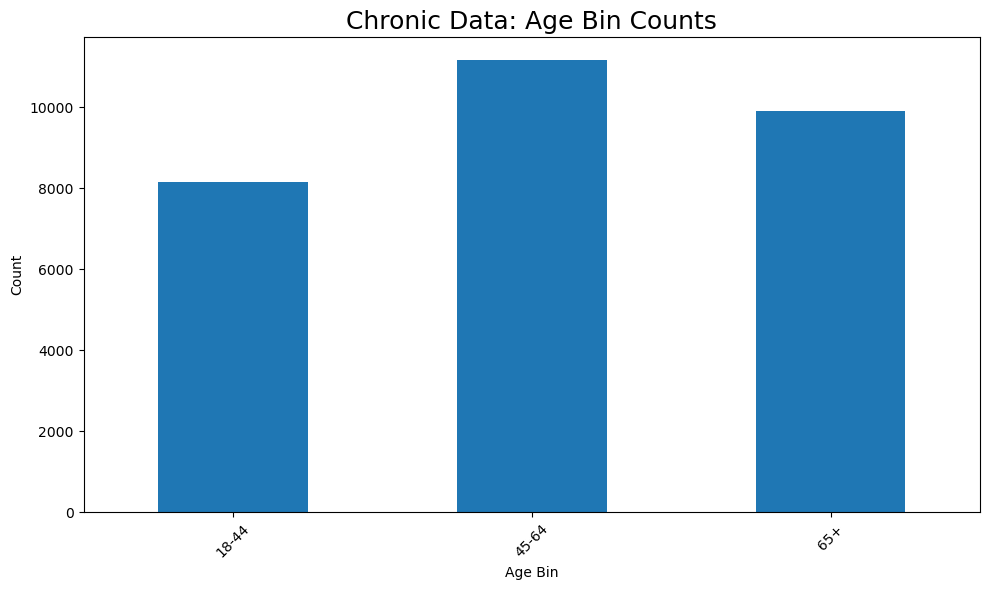

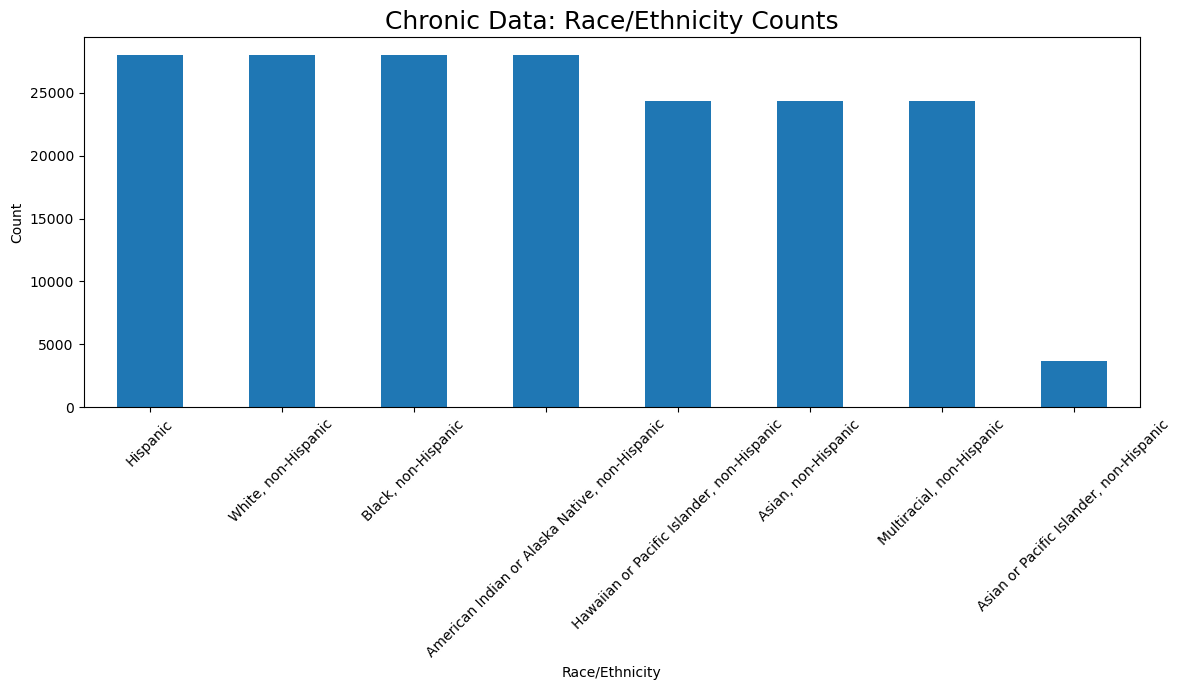

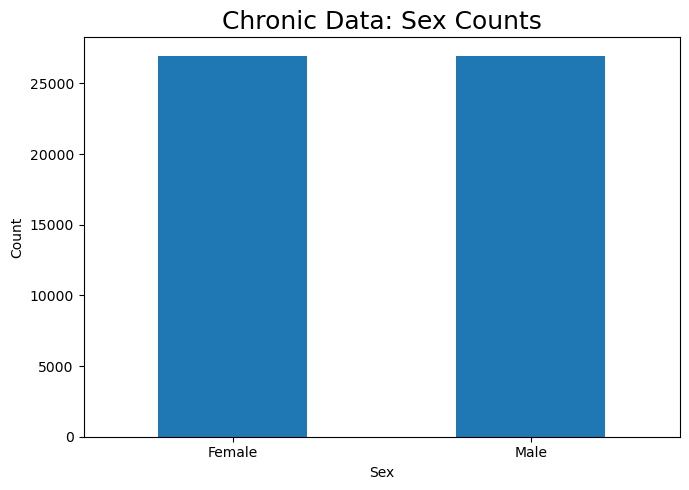

Three bar plots created!


In [2]:
url = "https://data.cdc.gov/api/views/hksd-2xuw/rows.csv?accessType=DOWNLOAD"
chronic_df = get_chronic_data(url)
chronic_age_df, chronic_race_df, chronic_sex_df = process_chronic_data(chronic_df)
analyze_chronic_data(chronic_age_df, chronic_race_df, chronic_sex_df)

--- Loading ../data/aw_fb_data.csv into DataFrame ---
Data loaded successfully
Cleaning aw_fb_data...
Data successfully cleaned.


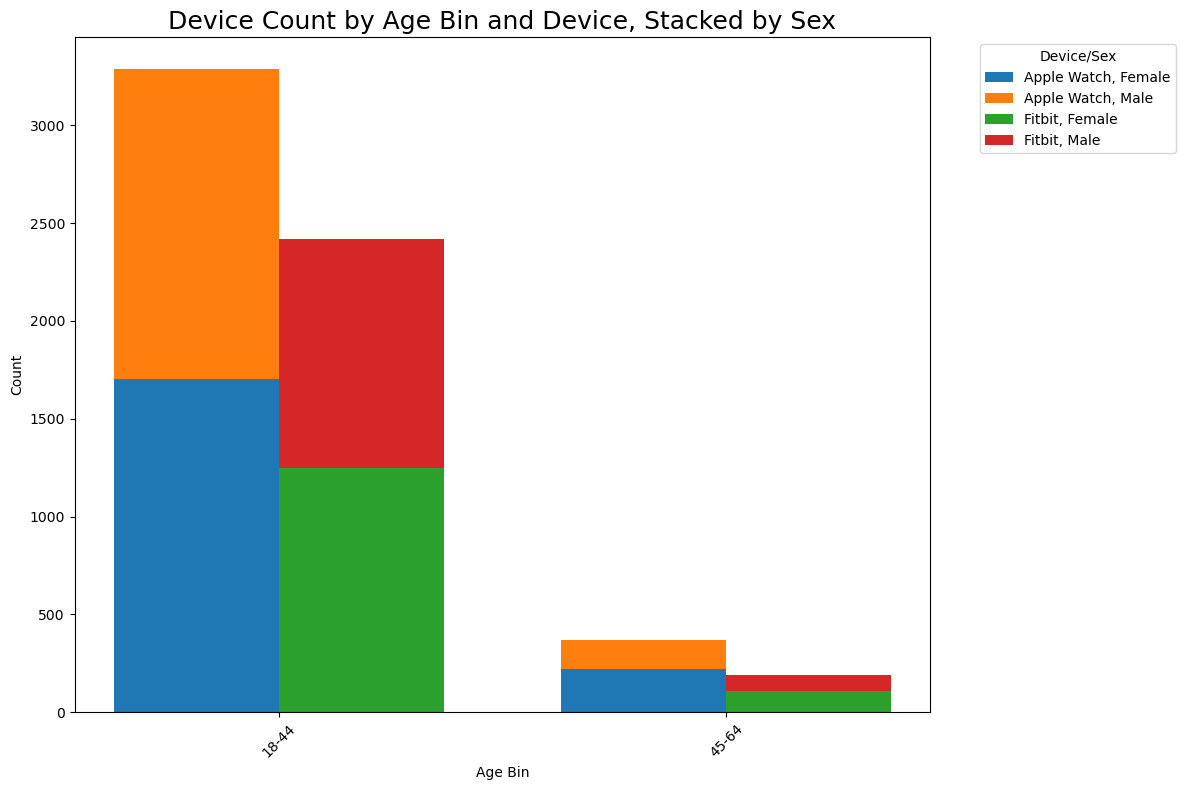

EDA for aw_fb plotted!


In [3]:
aw_fb_df_raw = get_csv('../data/aw_fb_data.csv')
aw_fb_df = process_aw_fb_data(aw_fb_df_raw)
analyze_aw_fb_data(aw_fb_df)

--- Loading ../data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv into DataFrame ---
Data loaded successfully
Cleaning nutri_data...
Creating nutri_sex_df...
Creating nutri_age_df...
Creating nutri_race_df...
Data successfully cleaned and split.


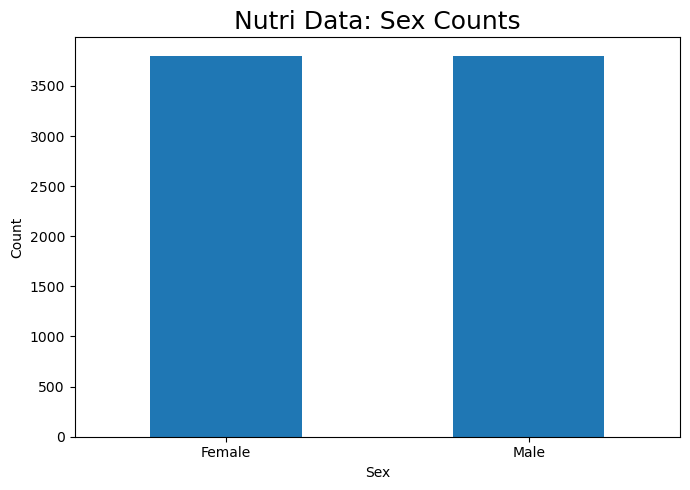

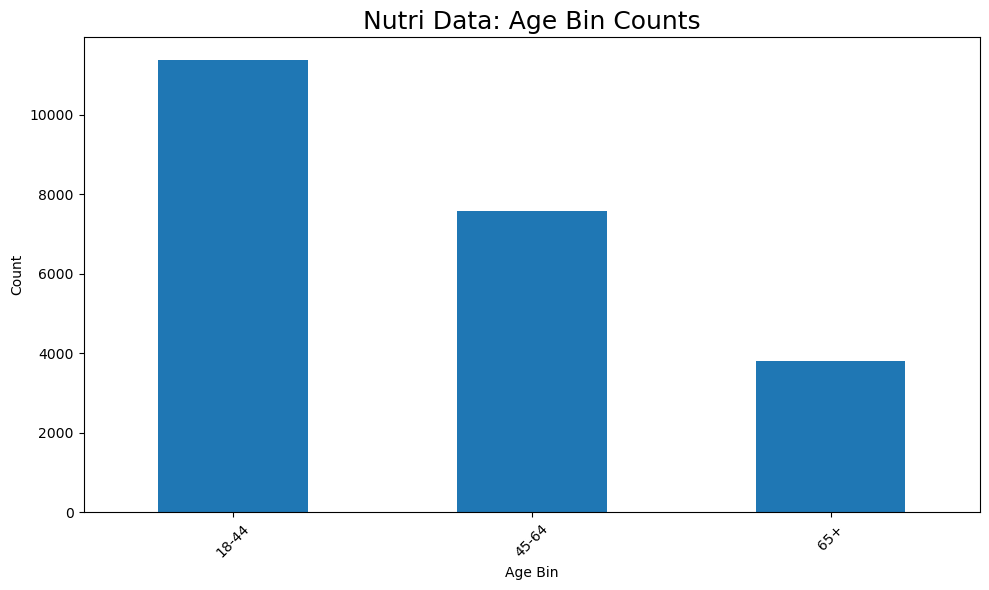

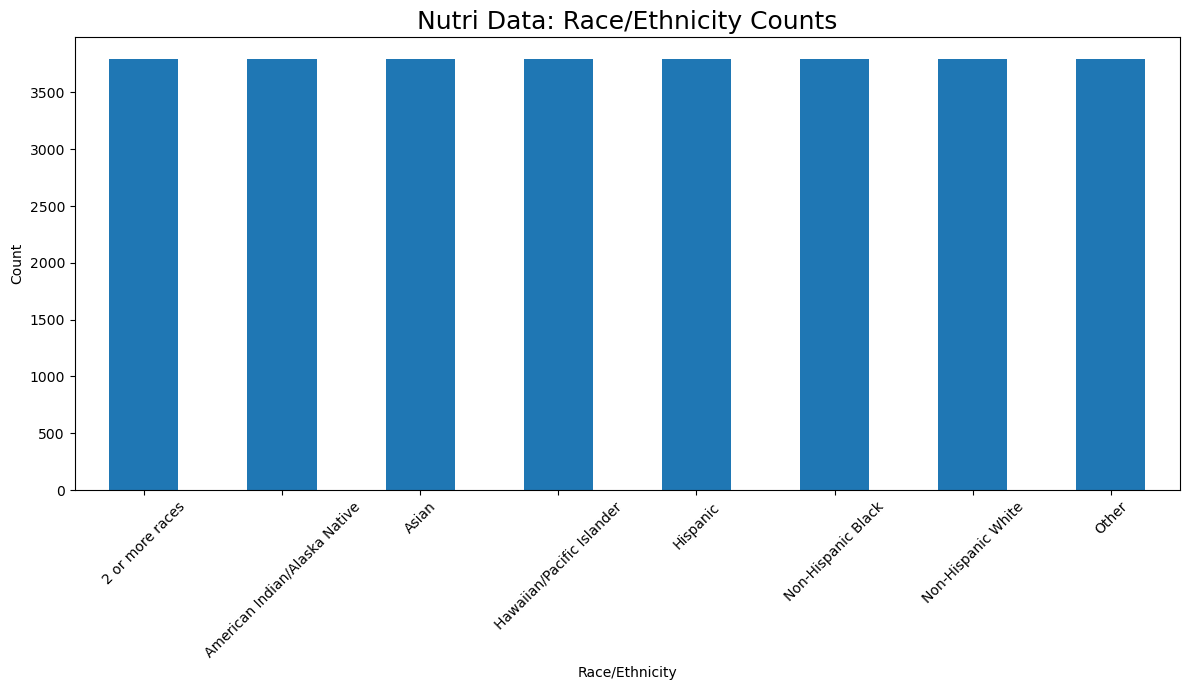

Three bar plots created!


In [4]:
nutri_df_raw = get_csv('../data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
nutri_sex_df, nutri_age_df, nutri_race_df = process_nutri_data(nutri_df_raw)
analyze_nutri_data(nutri_sex_df, nutri_age_df, nutri_race_df)

## Machine Learning (Part 1)

In the following cells, we use RandomForestClassifier to identify which groups of people are likely to experience both a chronic disease and weight concern.

### Assigning Sex and Age with Random Forest Classifier

In [5]:
nutri_combined = predict_sex_age_nutri(nutri_sex_df, nutri_age_df, nutri_race_df)
nutri_combined

Using RandomForestClassifier and one-hot-encoding for nutri_df...
Running classifier for Sex...
Assigning Sex...
Training classifier for Age Bin...
Assigning Age Bin...
Sex and Age Bin successfully assigned to nutri_df!


,YearStart,YearEnd,LocationDesc,Topic,Sample_Size,Race/Ethnicity,Sex,Age_Bin
6,2011,2011,Alabama,Obesity / Weight Status,58.0,2 or more races,Male,45-64
12,2011,2011,Alabama,Obesity / Weight Status,61.0,American Indian/Alaska Native,Male,45-64
13,2011,2011,Alabama,Obesity / Weight Status,NaN,Asian,Male,45-64
17,2011,2011,Alabama,Obesity / Weight Status,NaN,Hawaiian/Pacific Islander,Male,45-64
19,2011,2011,Alabama,Obesity / Weight Status,115.0,Hispanic,Male,45-64
...,...,...,...,...,...,...,...,...
106249,2023,2023,Virgin Islands,Physical Activity - Behavior,NaN,Hawaiian/Pacific Islander,Male,18-44
106251,2023,2023,Virgin Islands,Physical Activity - Behavior,257.0,Hispanic,Male,18-44
106255,2023,2023,Virgin Islands,Physical Activity - Behavior,1347.0,Non-Hispanic Black,Male,18-44
106256,2023,2023,Virgin Islands,Physical Activity - Behavior,237.0,Non-Hispanic White,Male,18-44


In [6]:
chronic_combined = predict_sex_age_chronic(chronic_sex_df, chronic_age_df, chronic_race_df)
chronic_combined

Using RandomForestClassifier and one-hot-encoding for chronic_df...
Running classifier for Sex...
Assigning Sex...
Training classifier for Age Bin...
Assigning Age Bin...
Sex and Age Bin successfully assigned to chronic_df!


,YearStart,YearEnd,LocationDesc,Topic,Race/Ethnicity,Sex,Age_Bin
3,2015,2019,Colorado,Cancer,Hispanic,Female,45-64
4,2015,2019,Georgia,Cancer,"White, non-Hispanic",Male,65+
7,2015,2019,New Jersey,Cancer,Hispanic,Male,65+
29,2016,2020,Kansas,Cancer,Hispanic,Female,65+
33,2016,2020,Mississippi,Cancer,"White, non-Hispanic",Male,45-64
...,...,...,...,...,...,...,...
309204,2022,2022,Utah,Social Determinants of Health,"White, non-Hispanic",Female,18-44
309208,2022,2022,Vermont,Sleep,"Asian, non-Hispanic",Female,18-44
309210,2022,2022,Virgin Islands,Tobacco,"American Indian or Alaska Native, non-Hispanic",Female,18-44
309212,2022,2022,Wisconsin,Immunization,"Black, non-Hispanic",Male,18-44


## Machine Learning (Part 2)

In the following cells, we use RandomForestClassifier to identify what kinds of chronic diseases, based on health data collected from Apple Watches and Fitbits, that the studied people might be encountering.

In [7]:
second_disease_df = predict_obesity(nutri_combined, chronic_combined)
second_disease_df[second_disease_df['Obesity_Binary'] == 1]

Assigning binary values for presence of obesity / weight problems...
Training classifier for Obesity_Binary...
Assigning Obesity_Binary...
Obesity_Binary successfully assigned!


,YearStart,YearEnd,LocationDesc,Topic,Race/Ethnicity,Sex,Age_Bin,Obesity_Binary
3,2015,2019,Colorado,Cancer,Hispanic,Female,45-64,1
33,2016,2020,Mississippi,Cancer,"White, non-Hispanic",Male,45-64,1
35,2016,2020,Nebraska,Cancer,"White, non-Hispanic",Female,45-64,1
41,2016,2020,South Dakota,Cancer,"Black, non-Hispanic",Female,45-64,1
42,2016,2020,Utah,Cancer,"Asian or Pacific Islander, non-Hispanic",Male,18-44,1
...,...,...,...,...,...,...,...,...
309201,2022,2022,Vermont,Oral Health,"Hawaiian or Pacific Islander, non-Hispanic",Male,18-44,1
309202,2022,2022,Wisconsin,Health Status,"American Indian or Alaska Native, non-Hispanic",Female,18-44,1
309203,2022,2022,Virginia,Health Status,"White, non-Hispanic",Female,18-44,1
309210,2022,2022,Virgin Islands,Tobacco,"American Indian or Alaska Native, non-Hispanic",Female,18-44,1


In [8]:
full_df = assign_disease(second_disease_df, aw_fb_df)
full_df

Training classifier for predicting disease...
Assigning whether disease should exist or not...
Successfully assigned disease to aw_fb_df!


,Device,Activity,Sex,Age,Age_Bin,Height_cm,Weight_kg,BMI,heart_rate,sd_norm_heart,resting_heart,intensity_karvonen,target_heart_rate,Disease,Possible Obesity,Possible_Disease,Assigned_Disease
0,Apple Watch,Lying,Male,20,18-44,168.0,65.4,23.171769,78.531302,1.000000,59.0,0.138520,61.705474,1,1,"Nutrition, Physical Activity, and Weight Status","Nutrition, Physical Activity, and Weight Status"
1,Apple Watch,Lying,Male,20,18-44,168.0,65.4,23.171769,78.453390,1.000000,59.0,0.137967,61.683932,1,1,"Nutrition, Physical Activity, and Weight Status","Nutrition, Physical Activity, and Weight Status"
2,Apple Watch,Lying,Male,20,18-44,168.0,65.4,23.171769,78.540825,1.000000,59.0,0.138587,61.708112,1,1,"Nutrition, Physical Activity, and Weight Status","Nutrition, Physical Activity, and Weight Status"
3,Apple Watch,Lying,Male,20,18-44,168.0,65.4,23.171769,78.628260,1.000000,59.0,0.139208,61.732401,1,1,"Nutrition, Physical Activity, and Weight Status","Nutrition, Physical Activity, and Weight Status"
4,Apple Watch,Lying,Male,20,18-44,168.0,65.4,23.171769,78.715695,0.241567,59.0,0.139828,61.756799,1,1,"Nutrition, Physical Activity, and Weight Status","Nutrition, Physical Activity, and Weight Status"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,Fitbit,Running 7 METs,Female,46,45-64,157.5,71.4,28.783069,35.000000,0.000000,35.0,0.000000,35.000000,0,1,Asthma,None
6260,Fitbit,Running 7 METs,Female,46,45-64,157.5,71.4,28.783069,35.000000,1.000000,35.0,0.000000,35.000000,0,1,Asthma,None
6261,Fitbit,Running 7 METs,Female,46,45-64,157.5,71.4,28.783069,35.000000,1.000000,35.0,0.000000,35.000000,0,1,Asthma,None
6262,Fitbit,Running 7 METs,Female,46,45-64,157.5,71.4,28.783069,35.000000,1.000000,35.0,0.000000,35.000000,0,1,Asthma,None


## Analyze Results

Below shows the distribution of our outputs, where the RandomForestClassifier identified the most likely chronic disease that a person might experience given their demographic information and physical indicators recorded from Apple Watches and Fitbits. For a more thorough analyis on the results, please take a look at the README.md file.

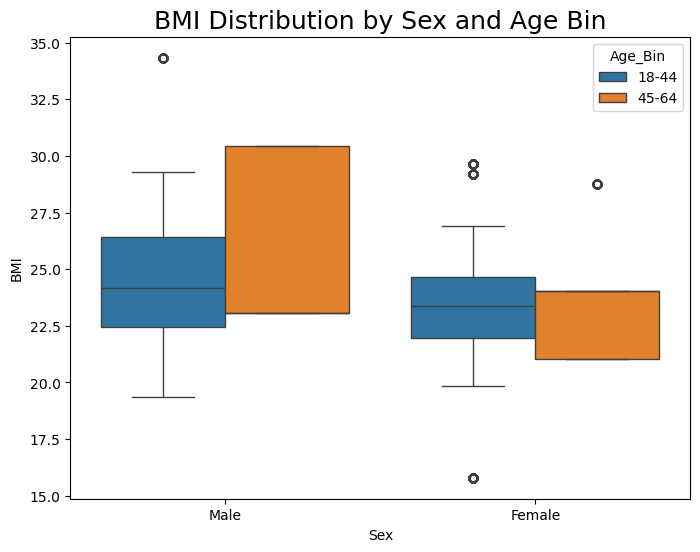

In [9]:
analyze_dem_info(full_df, save_dir=None)

In [10]:
disease_counts, disease_sex, disease_age = analyze_assigned_diseases(full_df)

Counting number of each disease...
Analyzing disease by sex...
Analyzing disease by age


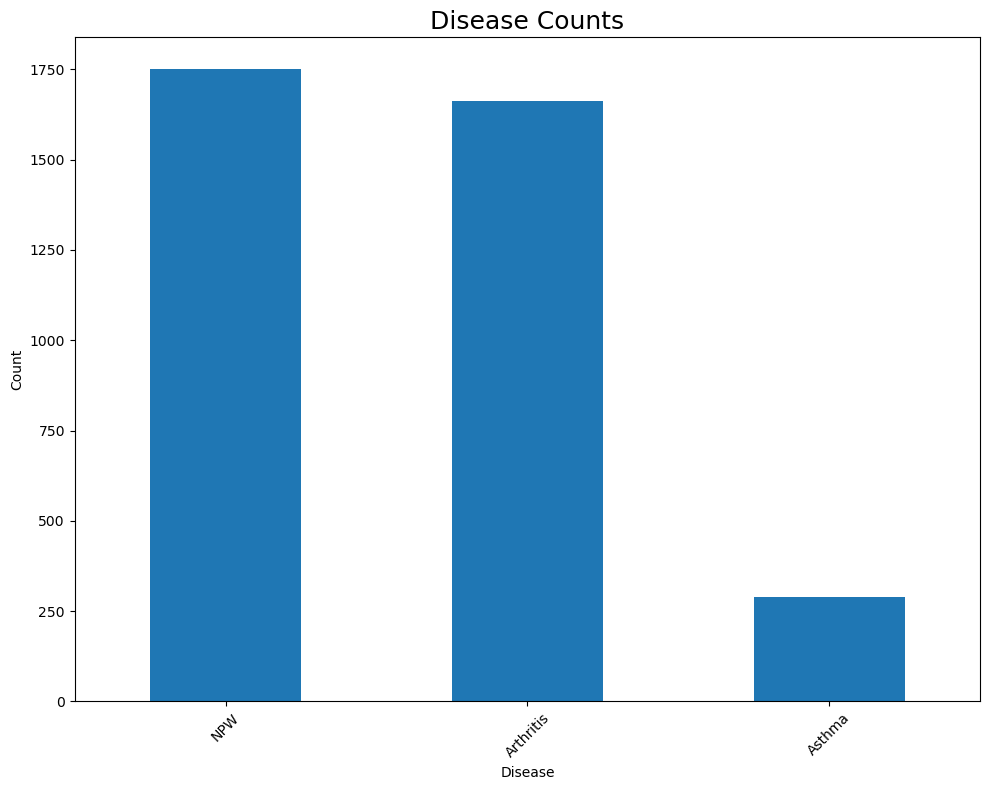

<Figure size 1000x800 with 0 Axes>

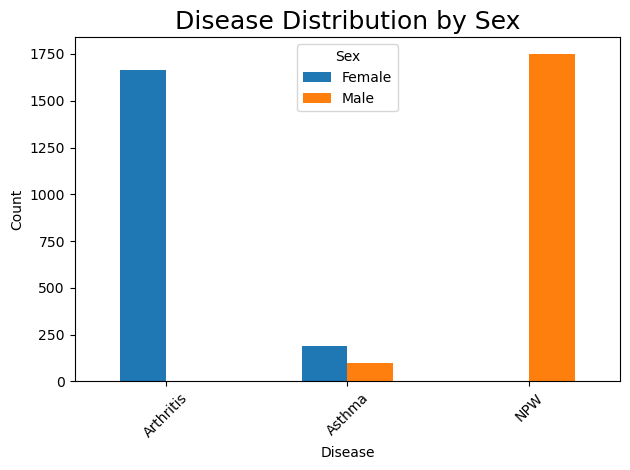

<Figure size 1000x800 with 0 Axes>

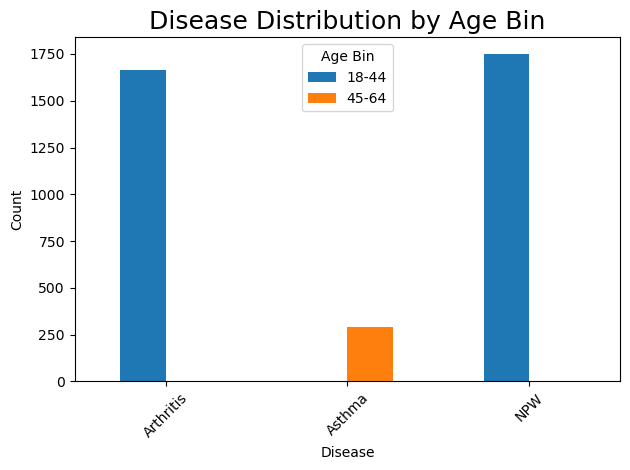

In [11]:
plot_disease_results(disease_counts, disease_sex, disease_age)